## Stroop effect Analysis

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition


In [63]:
import pandas as pd
import math as mth
import numpy as np
import matplotlib.pyplot as plt
df_stroop=pd.read_csv('stroopdata.csv')

In [64]:
df_stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


#### [1] What is our independent variable? What is our dependent variable?
**independent variable:** congruent and incongruent condition.

**dependent variable**: Time taken to complete the test.

#### [2] What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices


**Null Hypothsis:** $H_{0}(μ_{i} ≤ μ_{c})$ - There is no significant time difference between two reading tasks (congruent or incongruent).

**Alternate Hypothesis:** $H_{a}(μ_{i} > μ_{c})$ - Incongruent task take more time than congruent task.

Where **$μ_{i}$**: population mean of incongruent value & **$μ_{c}$**: population mean of congruent values

- Since it's a Dependent sample(We have one group of the sample that took two experiments),**Dependent T-test**(one-tailed as all Incongruent times are larger in our sample dataset) is best suited.We don't have population parameters provided so z-test is not appropriate here.


#### [3] Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [55]:
print('central tendency for congruent and incongruent respectively is')
df_stroop.mean()

central tendency for congruent and incongruent respectively is


Congruent      14.051125
Incongruent    22.015917
dtype: float64

In [56]:
print('measure of variability for congruent and incongruent respectively is')
df_stroop.std()

measure of variability for congruent and incongruent respectively is


Congruent      3.559358
Incongruent    4.797057
dtype: float64

In [57]:
df_stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


- From the standard deviation and mean data we can say that standard deviation and mean of incongruent condition is higher which is either due to wider distribution or presence of outliers.


#### [4] Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

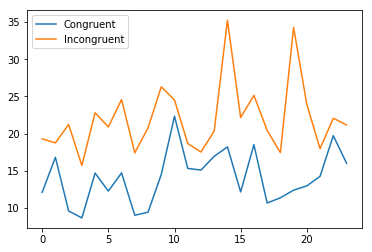

In [65]:
df_stroop.plot();

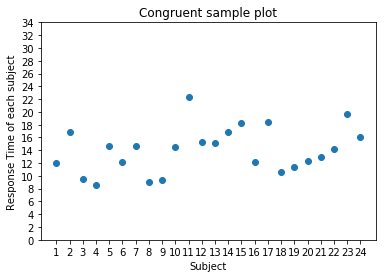

In [59]:
x = df_stroop.index+1
y = df_stroop['Congruent']
plot_inconngruent=plt.scatter(x, y)
plt.title('Congruent sample plot')
plt.xlabel('Subject')
plt.ylabel('Response Time of each subject')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2));

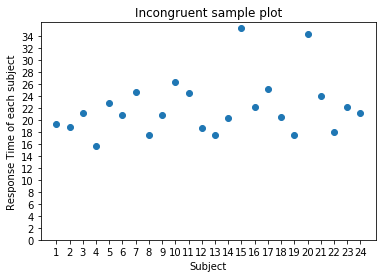

In [60]:
x = df_stroop.index+1
y = df_stroop['Incongruent']
plot_inconngruent=plt.scatter(x, y)
plt.title('Incongruent sample plot')
plt.xlabel('Subject')
plt.ylabel('Response Time of each subject')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2));

- These plots shows that presence of more outliers in Incongruent dataset is one of the reason for its higher standard deviation than Congruent dataset.

- For the congruent words sample identifying a word takes around 8 to 22 seconds and has a lower average completion time compared and incongruent words takes around 15 to about 26 seconds to identify a word with an outlier at 35 seconds.

- Comparison of these plots clearly show that average completion time for Incongruents words is definetly higer.

#### [5] Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

- One-Tailed T-test with confidence interval 95%.
- Degree of freedom = n-1=23
- T-critical=1.714
- (r²):0.737

In [61]:
df_stroop['difference']=df_stroop['Incongruent'] - df_stroop['Congruent']
mean_difference=df_stroop['Incongruent'].mean() - df_stroop['Congruent'].mean()
df_stroop['squared_dev']=((df_stroop['difference']-mean_difference)**2)
stdev=mth.sqrt(df_stroop['squared_dev'].sum())
sterror=stdev/mth.sqrt(24)
print('Mean difference of the given set is',mean_difference)
print('Standard error for the following data is',st_error)

Mean difference of the given set is 7.964791666666665
Standard error for the following data is 0.9930286347783406


In [62]:
print('Calculated T-value for the given dataset is',mean_difference/st_error)

Calculated T-value for the given dataset is 8.020706944109955


# conclusion
We **reject the null hypothesis** which says  There is no significant time difference between two reading tasks (congruent or incongruent) as the calculated T-statistic is greater T-critical value which is 8.0207 and 1.714 respectively.

#### References
https://en.wikipedia.org/wiki/Stroop_effect

http://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/